In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import control

# Efectos de la realimentación

## Objetivos
- Determinar la estabilidad de sistemas de lazo abierto y lazo cerrado.
- Verificar el efecto de cerrar un lazo de control sobre sistemas de  tiempo continuo.


## Lazo cerrado


Tomando como base el bucle típico de control de la siguiente figura.

![bucle](figuras/bucle_Laplace.png)

Puede deducirse que la función de transferencia desde la **referencia** $R(s)$ hasta la **controlada** $C(s)$.

Observe que el error se define como:
\begin{equation}
E(s) = R(s) - H(s) C(s)
\end{equation}
La señal **controlada** corresponde a la transformación que realiza el **controlador**, el **actuador** y la **planta** sobre el **error**.
\begin{align}
\color{yellow}{C(s)} &= \left (G_c(s)G_a(s)G_p(s)  \right )  E(s) \\
\color{yellow}{C(s)} &= \left (G_c(s)G_a(s)G_p(s) \right ) \left ( \color{yellow}{\color{yellow}{R(s)}} - H(s) \color{yellow}{C(s)} \right ) \\
\color{yellow}{C(s)} &= \left (G_c(s)G_a(s)G_p(s) \right ) \color{yellow}{\color{yellow}{R(s)}} - \left (G_c(s)G_a(s)G_p(s)H(s) \right )\color{yellow}{C(s)} \\
\end{align}
\begin{equation}
\color{yellow}{C(s)} +  \left (G_c(s)G_a(s)G_p(s)H(s) \right )\color{yellow}{C(s)}  =  \left (G_c(s)G_a(s)G_p(s) \right ) \color{yellow}{R(s)}
\end{equation}
\begin{equation}
\color{yellow}{C(s)} \left ( 1 +  G_c(s)G_a(s)G_p(s)H(s)\right ) =   \left (G_c(s)G_a(s)G_p(s) \right ) \color{yellow}{R(s)}
\end{equation}

Así, la función de transferencia de lazo cerrado es:

\begin{equation}
\frac{C(s)}{R(s)} = \frac{G_c(s)G_a(s)G_p(s)}{1 + G_c(s)G_a(s)G_p(s)H(s)}
\end{equation}

Para efectos prácticos se reune en un solo modelo a los sistemas **Actuador** y **Planta**, pues estos dos sistemas conforman el **Proceso** que se debe controlar. Así, la función de transferencia de lazo cerrado será:

\begin{equation}
\frac{C(s)}{R(s)} = \frac{G_c(s)G_p(s)}{1 + G_c(s)G_p(s)H(s)}
\end{equation}

Tenga en cuenta que $G_p(s)$ incorpora las dinámicas de **Actuador** y **Planta**.

El rol del **Sensor** requiere respuestas "rápidas" y "precisas".

El sistema **Controlador** debe ser diseñado para lograr comportamientos deseados en el sistema en lazo cerrado, es decir, se moldea la forma de $C(s)$ a partir de $R(s)$ ajustando $G_c(s)$ de forma apropiada.

## Lazo abierto vs Lazo cerrado

Las características más relevantes de la respuesta transitoria de un sistema está relacionada con la ubicación de sus polos.

De las ecuaciones anteriores, puede observarse que los polos se reubican en lazo cerrado de acuerdo con el controlador. Para este analisis considere los modelos lineales definidos como divisiones de polinomios.

\begin{equation}
\frac{C(s)}{R(s)} = \frac{G_c(s)G_p(s)}{1 + G_c(s)G_p(s)H(s)}
\end{equation}

\begin{equation}
\frac{C(s)}{R(s)} = \frac{\frac{N_c(s)}{D_c(s)}\frac{N_p(s)}{D_p(s)}}{1 + \frac{N_c(s)}{D_c(s)}\frac{N_p(s)}{D_p(s)}H(s)}
\end{equation}

Considere que el sensor es perfecto, es decir, $H(s)=1$.

La función de transferencia de lazo cerrado es:

\begin{equation}
\frac{C(s)}{R(s)} = \frac{\frac{N_c(s)N_p(s)}{D_c(s)D_p(s)}}{\frac{D_c(s)D_p(s) + N_c(s)N_p(s)}{D_c(s)D_p(s)}} = \frac{N_c(s)N_p(s)}{D_c(s)D_p(s) + N_c(s)N_p(s)}
\end{equation}

Mientras la función de transferencia de lazo abierto es:

\begin{equation}
\frac{C(s)}{R(s)} = \frac{N_c(s)N_p(s)}{D_c(s)D_p(s)}
\end{equation}

Observe que los numeradores se mantienen, esto indica que los ceros del sistema en lazo cerrado son los mismos que en lazo abierto.

Observe que los denominadores cambian, esto indica que los polos del sistema en lazo cerrado cambian respecto al lazo abierto.

**Ejemplo**

Suponga un proceso modelado por:

$$G_p(s) = \frac{2}{4s - 3}$$
$$G_p(s) = \frac{-2/3}{\frac{-4}{3}s + \frac{3}{3}}$$
$$G_p(s) = \frac{-2/3}{\frac{-4}{3}s + 1}$$



y una estrategia de contro definida por:

$$G_c(s) = k_c$$


polo del proceso es
$$s=3/4$$

- ¿El sistema $G_p$ es estable?
- ¿Qué efecto tiene realimentar el sistema con el controlador definido?

En análisis se realizará a partir de las raíces del sistema teniendo en cuenta que la función de transferencia de lazo cerrado es:

\begin{equation}
\frac{C(s)}{R(s)} =  \frac{N_c(s)N_p(s)}{D_c(s)D_p(s) + N_c(s)N_p(s)}
\end{equation}

$$G_{LC}(s) = \frac{2k_c}{4s - 3 + 2k_c}$$


Polo en lazo cerrado
$$4s-3+2k_c=0$$
$$s=\frac{3-2k_c}{4}$$

El sistema en lazo cerrado sería estable si el polo tiene parte real negativa, por lo que debe garantizarse que $k_c>3/2$ para que el sistema se comporte de forma estable.

In [2]:
# Se define la función de transferencia del proceso
Gp = control.tf([2], [4,-3])
Gp

TransferFunction(array([2]), array([ 4, -3]))

In [3]:
# Se hallan los polos del proceso
polos = Gp.pole()
polos

array([0.75+0.j])

In [4]:
# Se hallan los ceros del proceso
ceros = Gp.zero()
ceros

array([], dtype=complex128)

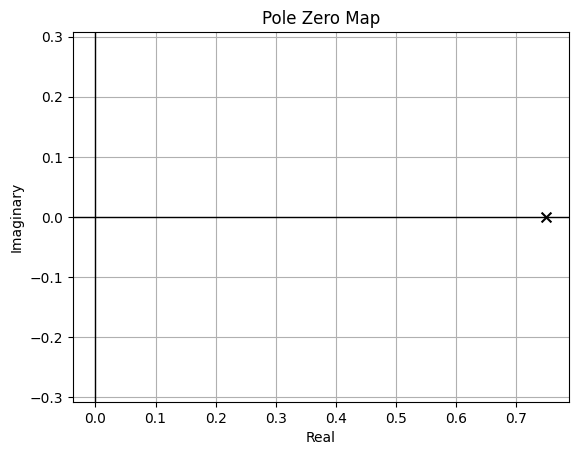

In [5]:
# Se grafica el mapa de polos y ceros
control.pzmap(Gp)
plt.grid(True)

- El sistema no tiene ceros.
- El sistema tiene un polo en $s = 0.75$.
- La respuesta dinámica del sistema está dominada por $e^{0.75t}$.
- Este sistema es inestable.

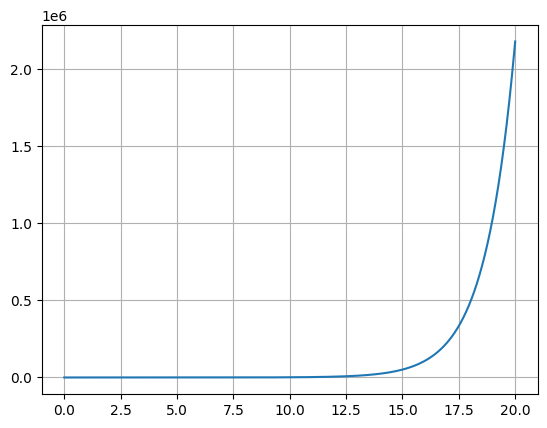

In [6]:
# Se grafica la respuesta al escalón
ts = np.linspace(0, 20, 1000)
_, y = control.step_response(Gp, ts)
plt.plot(ts, y)
plt.grid(True)

Se tomarán distintos escenarios para $G_c(s) = k_c$.


In [7]:
Gc1 = 0.5
Gc2 = 1.0
Gc3 = 1.5
Gc4 = 2.0
Gc5 = 2.5
Gc6 = 18.5
Gc7 = 21.5e3

In [8]:
# Caso 1
G_LC1 = control.feedback(Gc1*Gp,1)
_, y1 = control.step_response(G_LC1, ts)

G_LC1

TransferFunction(array([1.]), array([ 4., -2.]))

In [9]:
# Caso 2
G_LC2 = control.feedback(Gc2*Gp,1)
_, y2 = control.step_response(G_LC2, ts)
G_LC2

TransferFunction(array([2.]), array([ 4., -1.]))

In [10]:
# Caso 3
G_LC3 = control.feedback(Gc3*Gp,1)
_, y3 = control.step_response(G_LC3, ts)
G_LC3

TransferFunction(array([3.]), array([4., 0.]))

In [11]:
# Caso 4
G_LC4 = control.feedback(Gc4*Gp,1)
_, y4 = control.step_response(G_LC4, ts)
G_LC4

TransferFunction(array([4.]), array([4., 1.]))

In [12]:
# Caso 5
G_LC5 = control.feedback(Gc5*Gp,1)
_, y5 = control.step_response(G_LC5, ts)
G_LC5

TransferFunction(array([5.]), array([4., 2.]))

In [13]:
# Caso 6
G_LC6 = control.feedback(Gc6*Gp,1)
_, y6 = control.step_response(G_LC6, ts)
G_LC6

TransferFunction(array([37.]), array([ 4., 34.]))

In [14]:
# Caso 7
G_LC7 = control.feedback(Gc7*Gp,1)
_, y7 = control.step_response(G_LC7, ts)
G_LC7

TransferFunction(array([43000.]), array([4.0000e+00, 4.2997e+04]))

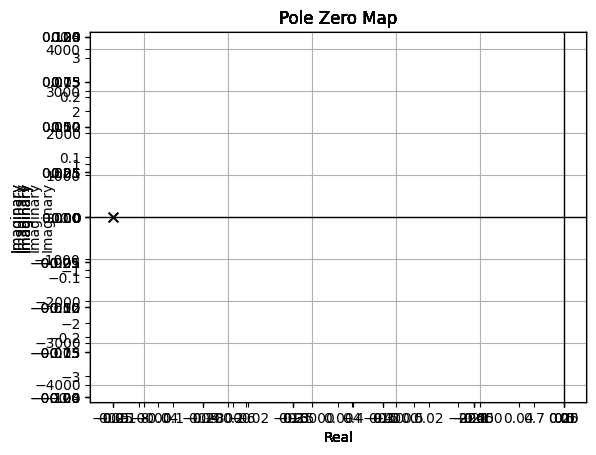

In [18]:
# Se grafica el mapa de polos y ceros para todos los escenarios
control.pzmap(Gp)
control.pzmap(G_LC1)
control.pzmap(G_LC2)
control.pzmap(G_LC3)
control.pzmap(G_LC4)
control.pzmap(G_LC5)
control.pzmap(G_LC6)
control.pzmap(G_LC7)
plt.grid(True)

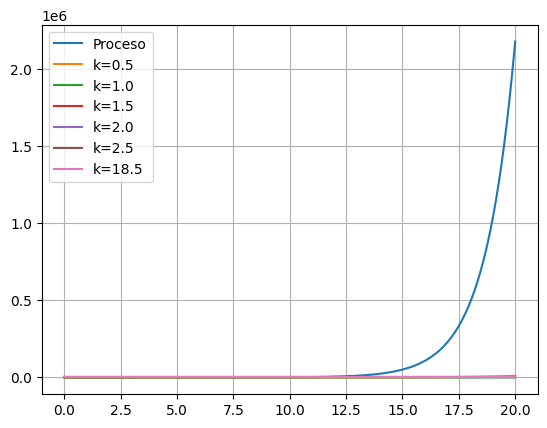

In [21]:
# Se grafica la respuesta al escalón para todos los escenarios
plt.plot(ts, y,ts, y1,ts, y2,ts, y3,ts, y4,ts, y5,ts, y6)
plt.legend(['Proceso',
            'k=' + str(Gc1),
            'k=' + str(Gc2),
            'k=' + str(Gc3),
            'k=' + str(Gc4),
            'k=' + str(Gc5),
            'k=' + str(Gc6),
            'k=' + str(Gc7)
           ])
plt.grid(True)

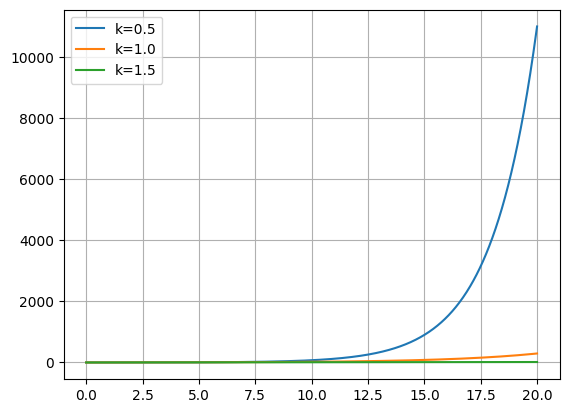

In [22]:
# Se grafica la respuesta al escalón para los escenarios inestables
#plt.plot(ts, y,ts, y1,ts, y2,ts, y3)
plt.plot(ts, y1,ts, y2,ts, y3)
plt.legend(['k=' + str(Gc1),
            'k=' + str(Gc2),
            'k=' + str(Gc3)])
plt.grid(True)

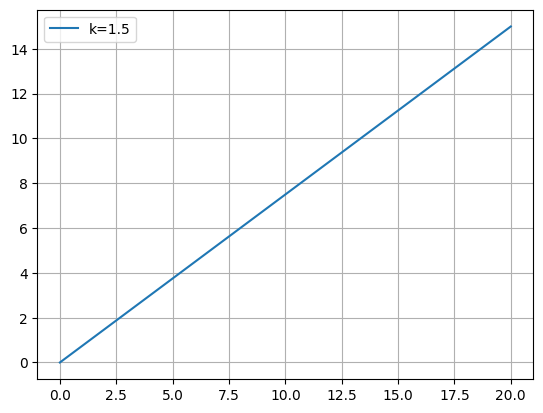

In [23]:
# Se grafica la respuesta al escalón para los escenarios inestables
#plt.plot(ts, y,ts, y1,ts, y2,ts, y3)
plt.plot(ts, y3)
plt.legend(['k=' + str(Gc3)])
plt.grid(True)

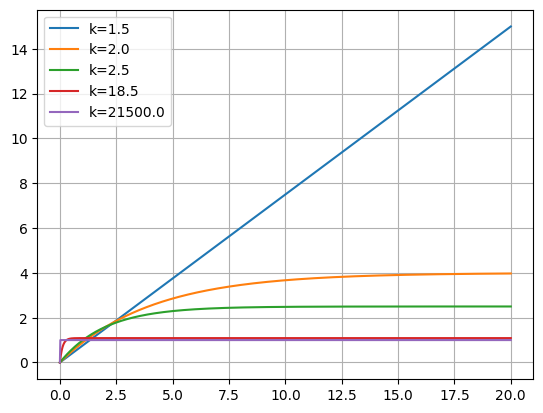

In [20]:
# La respuesta al escalón para los escenarios estables y el integrador
plt.plot(ts, y3,ts, y4,ts, y5,ts,y6,ts,y7)
plt.legend(['k=' + str(Gc3),
            'k=' + str(Gc4),
            'k=' + str(Gc5),
            'k=' + str(Gc6),
           'k=' + str(Gc7)])
plt.grid(True)

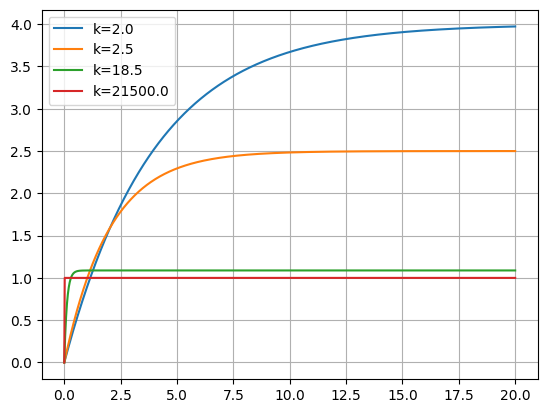

In [24]:
# La respuesta al escalón para los escenarios estables y el integrador
plt.plot(ts, y4,ts, y5,ts,y6,ts,y7)
plt.legend(['k=' + str(Gc4),
            'k=' + str(Gc5),
            'k=' + str(Gc6),
            'k=' + str(Gc7)])
plt.grid(True)

(0.0, 2.0)

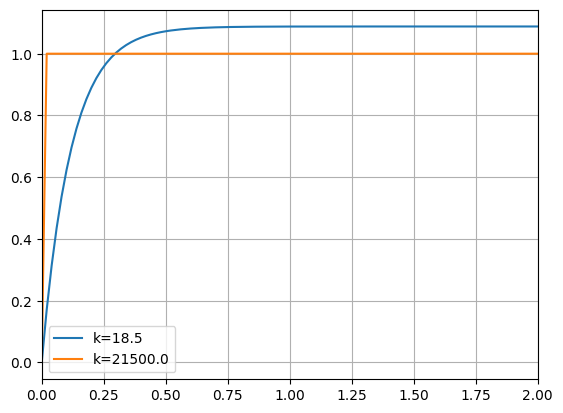

In [25]:
# La respuesta al escalón para los escenarios estables y el integrador
plt.plot(ts,y6,ts,y7)
plt.legend(['k=' + str(Gc6),
            'k=' + str(Gc7)])
plt.grid(True)
plt.xlim([0,2])

**Observaciones**

- El proceso es de primer orden inestable.
- El controlador de modelo $G_c(s) = k_c$ fue capaz de estabilizar al sistema a partir de un valor determinado de $k_c$
- Una vez estable, el efecto de aumentar $k_c$ se aprecia en la reducción del tiempo de estabilización.

**Preguntas**
- ¿Puede identificar qué efecto tiene aumentar $k_c$ sobre el valor final de la señal controlada?
- ¿Puede identificar qué efecto tiene aumentar $k_c$ sobre el valor final de la señal de error?